# BUAN 6340.003 - Programming with Data Science - S18
## Final Project Submission by
Name   :   Prashant Shivaji Bhapkar  
NetId    :   pxb170130

## Table Of Contents  

1. Data Description
2. EDA - Exploratory Data Analysis with some helpful visualizations
3. Model Design

## 1. Data Description

The data set comprises of various people and their employment status, which is the target attribute. Yes, this is a classification problem. There are various other independent variables which are present in the data set. Let's have a quick look at each of them below.

    • ID: An Id that represents a person within the training set
    • Education: It represents Education level of a person (9th, 10th, 11th, 12th grade, Associate, bachelor’s, master’s degree etc.)
    • Age: Age of a person
    • Age range: Age Range of a person (0-19, 20-29, 30-39………70-79, 80+)
    • Employment: Whether that person is employed or not
    • Children: Number of children a person has
    • Weekly earnings: Earnings in dollars/week
    • Column k- Column x: Average time spend by a person on a particular activity per day in minutes
    • Total: Total of average time spend (In hours) by a person in a day.
    Note: values of this column may exceed above 24hrs (2 activities may have been considered twice). Like Food & drink prep is considered individually as well as in housework (Assumption)

## 2. EDA - Exploratory Data Analysis
Let's first try to understand our data and make it tell some interesting stories

In [61]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy import stats
import warnings
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from imblearn.combine import SMOTETomek
from collections import Counter
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import KFold
from sklearn import metrics, svm
from sklearn.metrics import f1_score
from sklearn.metrics import zero_one_loss
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import itertools
warnings.filterwarnings('ignore')

In [2]:
# Load the training data set whcih is present in EXCEL spreadsheet
xl = pd.ExcelFile('F:/UTD Life/Courses/Spring 18 - 2nd sem/Programming for Data Science/Project/Training Dataset.xlsx')

In [3]:
xl.sheet_names

['Sheet1']

In [4]:
# Let's print some data points
df_train = xl.parse('Sheet1')
df_train.head()

,Id,Education Level,Age,Age Range,Employment Status,Gender,Children,Weekly Earnings,Year,Weekly Hours Worked,...,Playing with Children,Job Searching,Shopping,Eating and Drinking,Socializing & Relaxing,Television,Golfing,Running,Volunteering,Total
0,1,High School,51,50-59,Unemployed,Female,0,0,2005,0,...,0,0,0,40,180,120,0,0,0,24.000000
1,2,Bachelor,42,40-49,Employed,Female,2,1480,2005,40,...,20,0,120,40,15,15,0,0,0,21.583333
2,3,Master,47,40-49,Employed,Male,0,904,2005,40,...,0,0,15,85,214,199,0,0,0,17.733333
3,4,Some College,21,20-29,Employed,Female,0,320,2005,40,...,0,0,105,30,240,240,0,0,0,26.833333
4,5,High School,49,40-49,Not in labor force,Female,0,0,2005,0,...,0,0,0,35,600,40,0,0,0,23.750000


In [5]:
# Let's get some information about the data set 
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64006 entries, 0 to 64005
Data columns (total 25 columns):
Id                        64006 non-null int64
Education Level           64006 non-null object
Age                       64006 non-null int64
Age Range                 64006 non-null object
Employment Status         64006 non-null object
Gender                    64006 non-null object
Children                  64006 non-null int64
Weekly Earnings           64006 non-null int64
Year                      64006 non-null int64
Weekly Hours Worked       64006 non-null int64
Sleeping                  64006 non-null int64
Grooming                  64006 non-null int64
Housework                 64006 non-null int64
Food & Drink Prep         64006 non-null int64
Caring for Children       64006 non-null int64
Playing with Children     64006 non-null int64
Job Searching             64006 non-null int64
Shopping                  64006 non-null int64
Eating and Drinking       64006 non-null 

In [6]:
# Checking for null values
df_train.isnull().sum()

Id                        0
Education Level           0
Age                       0
Age Range                 0
Employment Status         0
Gender                    0
Children                  0
Weekly Earnings           0
Year                      0
Weekly Hours Worked       0
Sleeping                  0
Grooming                  0
Housework                 0
Food & Drink Prep         0
Caring for Children       0
Playing with Children     0
Job Searching             0
Shopping                  0
Eating and Drinking       0
Socializing & Relaxing    0
Television                0
Golfing                   0
Running                   0
Volunteering              0
Total                     0
dtype: int64

This is really great. No NULL values at all!

In [7]:
# Let's investigate the distinct values of target variable - Employmment Status
df_train['Employment Status'].unique()

array(['Unemployed', 'Employed', 'Not in labor force'], dtype=object)

In [8]:
# Let's convert hours into minutes and make sure everythin is on the same scale
df_train['Weekly Hours Worked'] = df_train['Weekly Hours Worked'].apply(lambda x: x*60)
df_train['Total'] = df_train['Total'].apply(lambda x: x*60)
df_train.head()

,Id,Education Level,Age,Age Range,Employment Status,Gender,Children,Weekly Earnings,Year,Weekly Hours Worked,...,Playing with Children,Job Searching,Shopping,Eating and Drinking,Socializing & Relaxing,Television,Golfing,Running,Volunteering,Total
0,1,High School,51,50-59,Unemployed,Female,0,0,2005,0,...,0,0,0,40,180,120,0,0,0,1440.0
1,2,Bachelor,42,40-49,Employed,Female,2,1480,2005,2400,...,20,0,120,40,15,15,0,0,0,1295.0
2,3,Master,47,40-49,Employed,Male,0,904,2005,2400,...,0,0,15,85,214,199,0,0,0,1064.0
3,4,Some College,21,20-29,Employed,Female,0,320,2005,2400,...,0,0,105,30,240,240,0,0,0,1610.0
4,5,High School,49,40-49,Not in labor force,Female,0,0,2005,0,...,0,0,0,35,600,40,0,0,0,1425.0


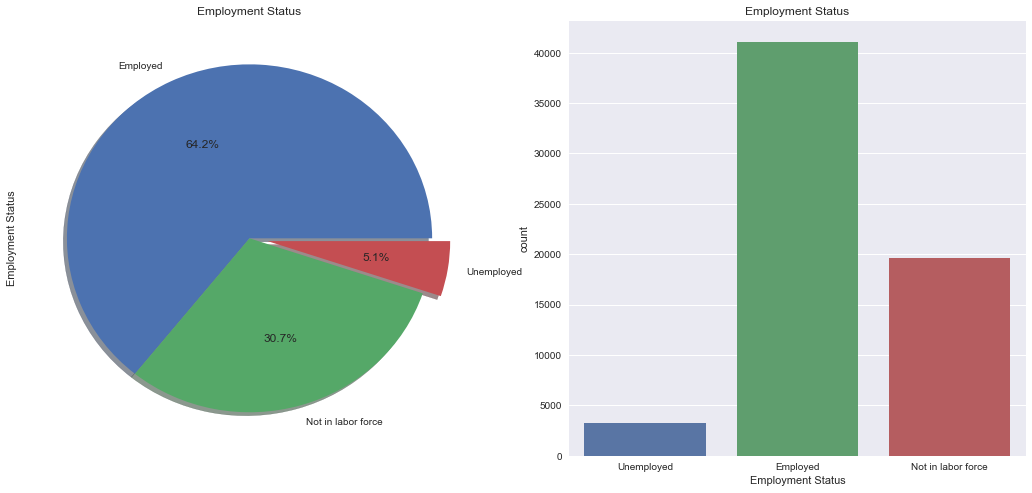

In [9]:
# Distribution of Employment Status
f, ax = plt.subplots(1, 2, figsize=(18, 8))
df_train['Employment Status'].value_counts().plot.pie(explode=[0,0,0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
# data['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)

ax[0].set_title('Employment Status')
sns.countplot('Employment Status', data=df_train, ax=ax[1])
ax[1].set_title('Employment Status')
plt.show()

Looks like the majority of people are/were employed according to this data. This account for 64.2% of the sample size, which is quite high given 3 classes. 30.7% of people are/were 'Not in labor force', while only 5.1% of the entire population(sample) were unemployed.  
  
Well, that gives a good overview of the overall distribution of our target variable. But, how each of the other features affect this target variable. We'll need to dive deep into the data for that. Let's proceed.

But, for our model to give accurate results, we should do something to resolve the imbalance in the data.The proportion of 64.2:30.7:5.1 among 3 classes won't give us good results. We need to make this even. In short, we should be having equal number of samples for all the 3 classes.

For this we'll use **SMOTETomek** to synthesize data for classes with less samples to make everything even. But, we'll do it later after we analyze the actual data set. Let's add this in our **TO-DO-LIST**.

## Feature - Analysis

### Education Level : Categorical Variable

In [10]:
# Distribution of Employment Status across Education Level
df_train.groupby(['Education Level', 'Employment Status'])['Employment Status'].count()

Education Level   Employment Status 
10th grade        Employed                828
                  Not in labor force     1273
                  Unemployed              289
11th grade        Employed               1061
                  Not in labor force     1071
                  Unemployed              308
12th grade        Employed                397
                  Not in labor force      296
                  Unemployed               63
9th grade         Employed                687
                  Not in labor force     1155
                  Unemployed              238
Associate Degree  Employed               4429
                  Not in labor force     1410
                  Unemployed              241
Bachelor          Employed               9930
                  Not in labor force     2752
                  Unemployed              360
Doctoral Degree   Employed                797
                  Not in labor force      170
                  Unemployed               

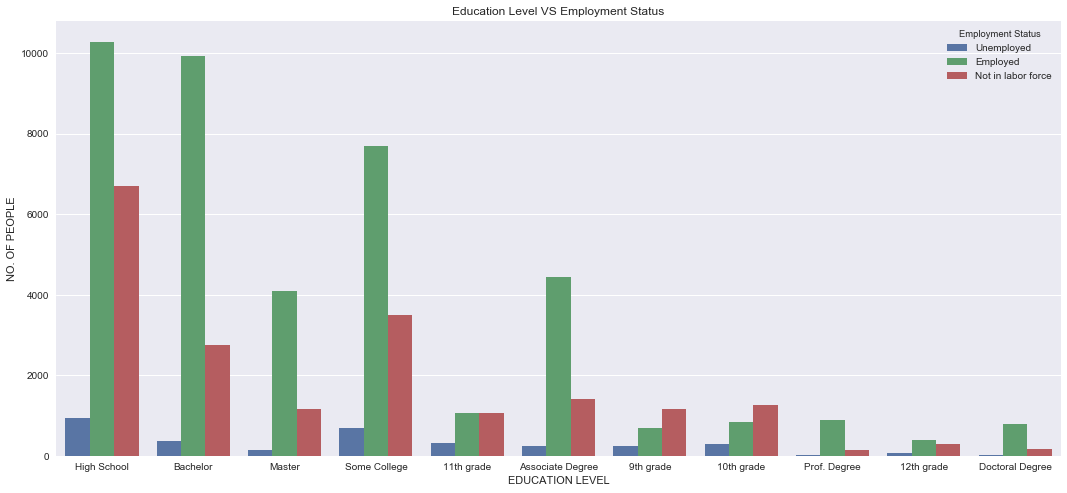

In [11]:
# Visualization of distribution of Employment Status across Education Level
f, ax = plt.subplots(1, 1, figsize=(18,8))
sns.countplot('Education Level', hue='Employment Status', data=df_train, ax=ax)
ax.set_title('Education Level VS Employment Status')
ax.set_ylabel('NO. OF PEOPLE')
ax.set_xlabel('EDUCATION LEVEL')
plt.show()

It looks like there are are high number of samples that are employed for education levels : high school , Bachelor, Master. This trend tends to decrease as the education level decreases, explaining the obvious relation - **you'll earn more (be employed) if you'll study more (higher education level)** *(A thought shared by my parents. Some relevance here :) )*

### Gender : Categorical Variable

In [12]:
# Distribution of Gender across Employement Status
df_train.groupby(['Gender', 'Employment Status'])['Employment Status'].count() 

Gender  Employment Status 
Female  Employed              21206
        Not in labor force    13194
        Unemployed             1732
Male    Employed              19892
        Not in labor force     6436
        Unemployed             1546
Name: Employment Status, dtype: int64

In [13]:
# Male-to-Female ratio in the data
df_train['Gender'].value_counts()/len(df_train)*100

Female    56.450958
Male      43.549042
Name: Gender, dtype: float64

As far as the data is concerned, the gender looks to be quite evenly distributed as the Male Percentage and Female Percentage are nearly equal. No one particular gender has majority of samples, which is good.

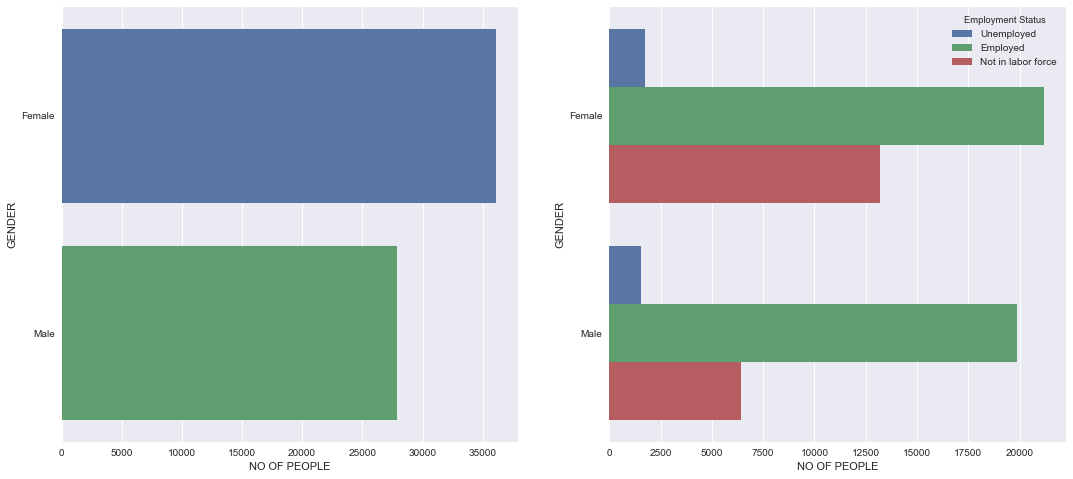

In [14]:
# Visualization for same
fig, ax = plt.subplots(1, 2, figsize=(18,8))
sns.countplot(y='Gender', data=df_train, ax=ax[0])
ax[0].set_ylabel('GENDER')
ax[0].set_xlabel('NO OF PEOPLE')
sns.countplot(y='Gender', hue='Employment Status', data=df_train, ax=ax[1])
ax[1].set_ylabel('GENDER')
ax[1].set_xlabel('NO OF PEOPLE')
plt.show()

Distribution looks kind of even across both the GENDERs as far as EMPLOYMENT STATUS is concerned. For both the genders (Male and Female), number of people that are 'EMPLOYED' is highest compared to other classes. There is a common trend for both the genders. For both the genders,  
**No of people (EMPLOYED) > No of people (NOT IN LABOR FORCE) > No of people (UNEMPLOYED)**

### Year : Categorical Variable

In [15]:
# Year distribution across Employment Status
df_train['Year'].value_counts().sort_values()

2005    7999
2012    8001
2011    8001
2010    8001
2009    8001
2008    8001
2007    8001
2006    8001
Name: Year, dtype: int64

For each year we have almost equal number of samples.

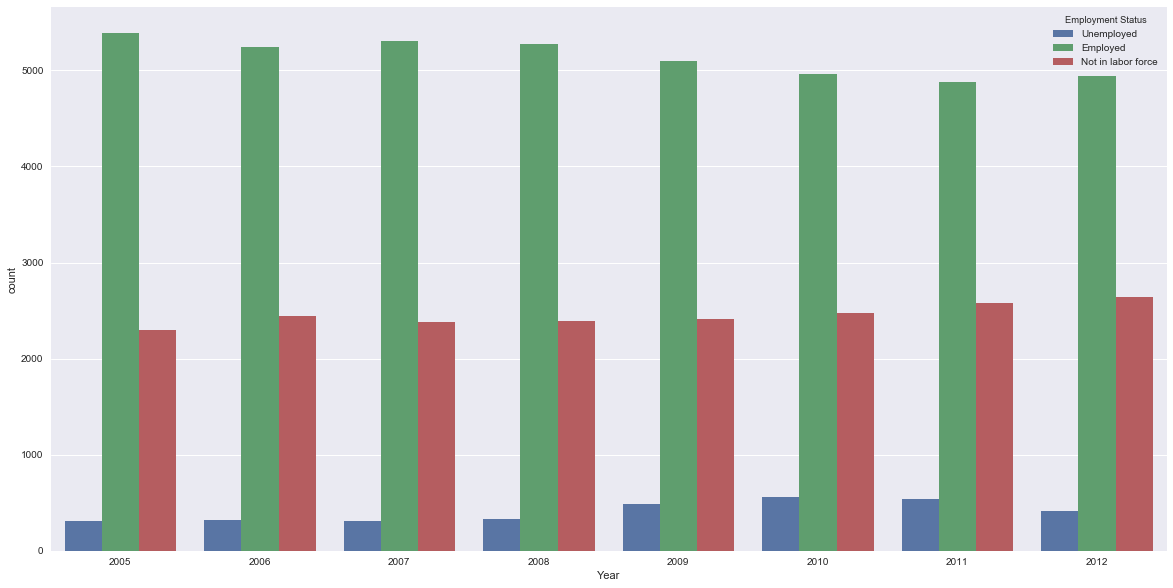

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(20,10))
sns.countplot(x='Year', hue='Employment Status', data=df_train, ax=ax)
plt.show()

Number of **UNEMPLOYED** people tend to increase over the years on average, untill 2010 after which it decreases by a smaller margin.

Number of **EMPLOYED** people have decreased over the years on average.

Number of people **NOT IN LABOR FORCE** have increased over the years on average.  

### Age Range : Categorical Variable

In [17]:
# Age Range distribution across Employment Status
df_train['Age Range'].value_counts()

40-49    13348
30-39    12940
50-59    10836
60-69     7799
20-29     7706
70-79     4719
0-19      3973
80+       2685
Name: Age Range, dtype: int64

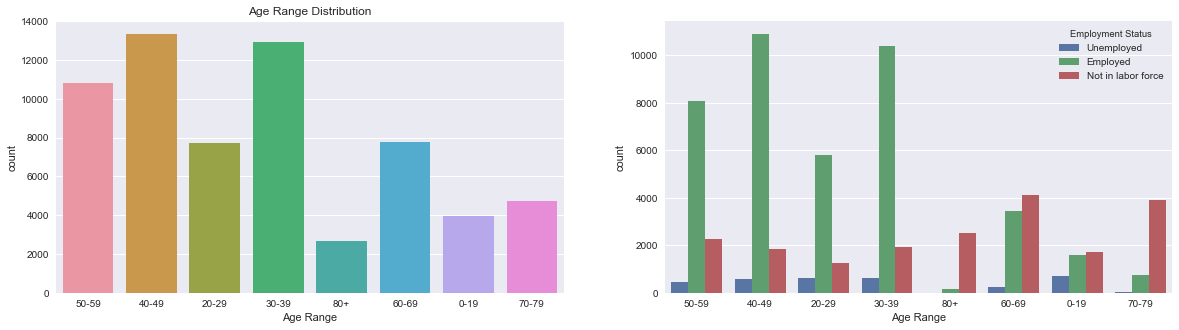

In [18]:
# Visualizing Age Range distribution across Employment Status
fig, ax = plt.subplots(1, 2, figsize=(20,5))
sns.countplot('Age Range', data=df_train, ax=ax[0])
ax[0].set_title('Age Range Distribution')
sns.countplot('Age Range', hue='Employment Status', data=df_train, ax=ax[1])
plt.show()

Looks interesting.  
  
There are more number of samples for age ranges: 20-29, 30-39, 40-49, and 50-59. This also explains the fact that most people work when their ages are in these ranges. This is supported by the bar chart on the right. We can see that there are indeed more number of samples(people) that are employed compared to other classes for these age ranges.   

As one would expect, the trend tends to invert when the age range increases. That is, for higher age ranges (60-69, 70-79 and 80+) as well as lowest age range (0-19, denoting children), most of the samples(people) are unemployed.

### Children : Categorical Variable

In [19]:
# Children distribution
df_train['Children'].value_counts().sort_values(ascending=False)

0     33571
1     12552
2     11680
3      4409
4      1304
5       332
6       108
7        29
8        14
9         3
10        2
11        1
12        1
Name: Children, dtype: int64

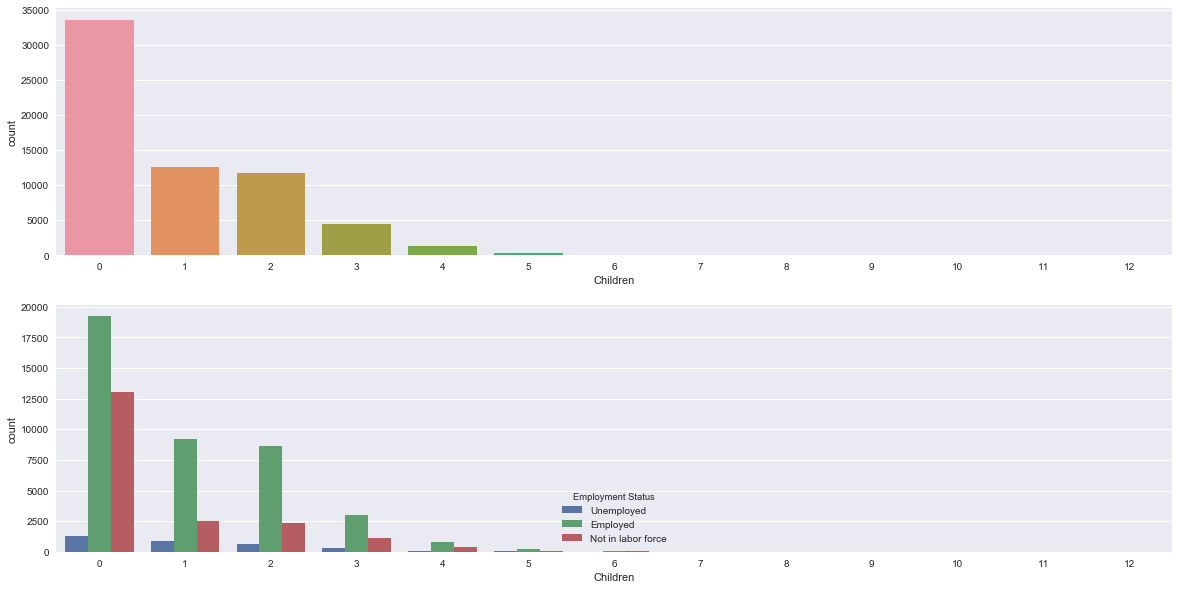

In [20]:
# Visualizing Children distribution across Employment Status
fig, ax = plt.subplots(2, 1, figsize=(20,10))
sns.countplot('Children', data=df_train, ax=ax[0])
sns.countplot('Children', hue='Employment Status', data=df_train, ax=ax[1])
plt.show()

There are too many samples where people don't have children. Also, for these samples, there's a really high percentage of pepople that are employed. Also, somewhat similar, but a bit lesser percentage of people are unemployed.

A trend that is visible in this chart is that - *Almost for every case the proportion of **EMPLOYED:UNEMPLOYED:NOT IN LABOR FORCE** remains same. However, the number of samples decreases as number of children increases.*

### Weekly Earnings : Continuous Variable

In [21]:
print('Maximum Weekle Earning is : ', df_train['Weekly Earnings'].max())
print('Minimum Weekle Earning is : ', df_train['Weekly Earnings'].min())
print('Average Weekle Earning is : ', df_train['Weekly Earnings'].mean())

Maximum Weekle Earning is :  2885
Minimum Weekle Earning is :  0
Average Weekle Earning is :  485.69787207449303


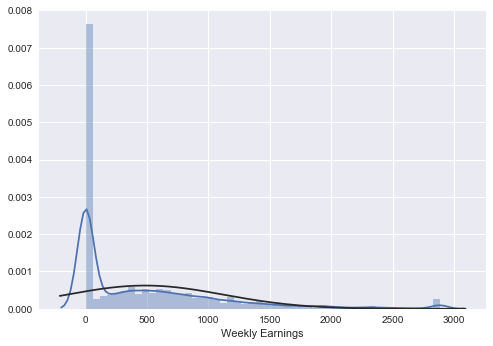

In [22]:
sns.distplot(df_train['Weekly Earnings'], fit=norm)
plt.show()

Looks like the data is positively skewed. Disproportionately, a very high number of samples are there that don't earn anything.

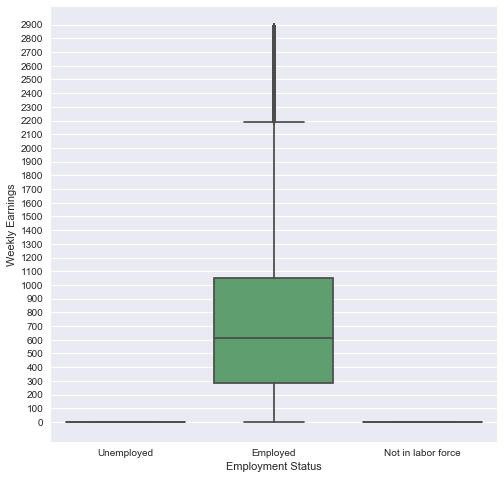

In [23]:
# Visualizing Weekly Earnings across Employment Status
var = 'Weekly Earnings'
data = pd.concat([df_train['Weekly Earnings'], df_train['Employment Status']], axis=1)
f, ax = plt.subplots(1, 1, figsize=(8, 8))
sns.boxplot(y=var, x='Employment Status', data=data, ax=ax)
plt.yticks(np.arange(0, 3000, 100.0))
plt.show()

As we can see, on average, employed people earn about 610 with the maximum and minimum weekly earnings being 2200 and 0 respectively.

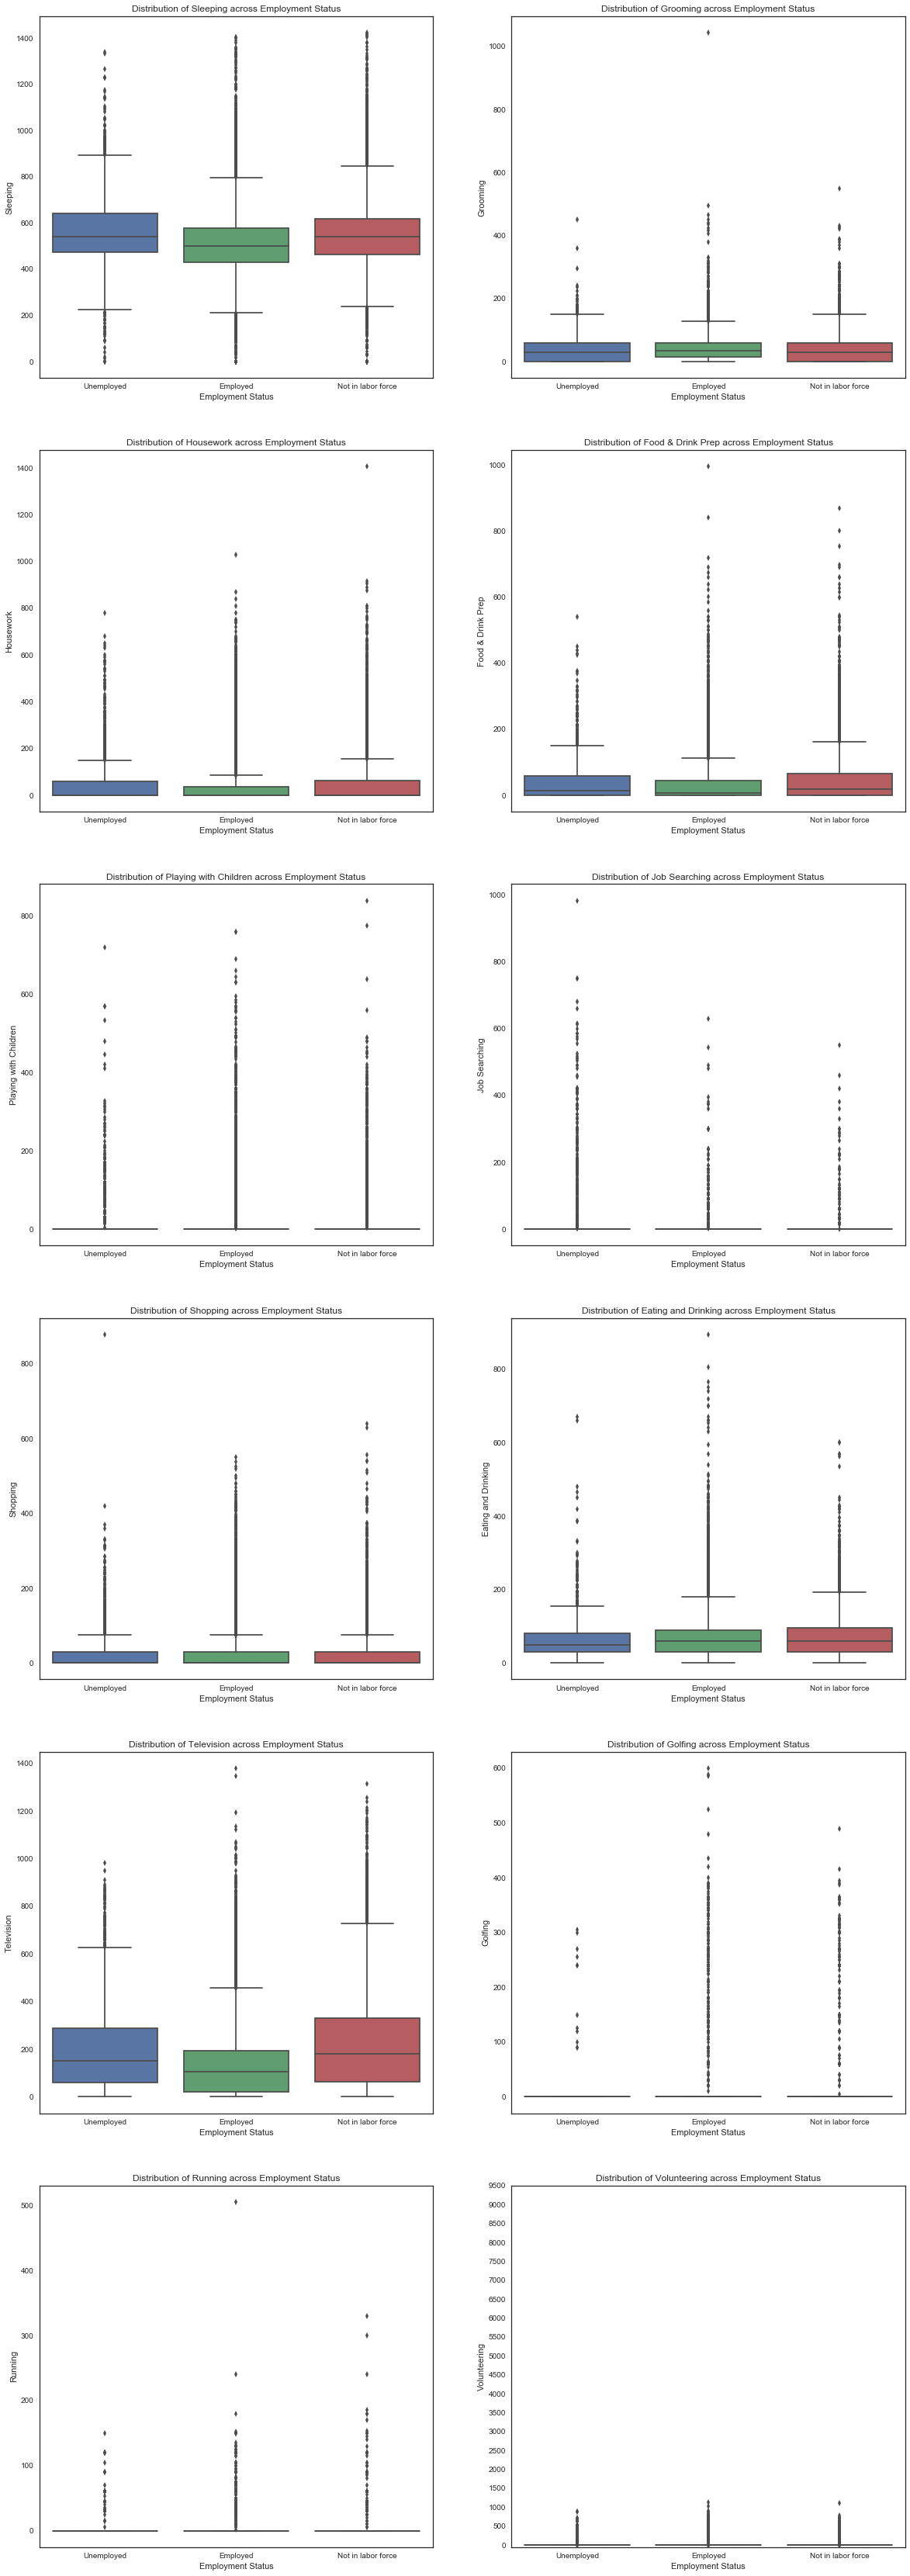

In [89]:
# Visualizing Weekly Hours Worked across Employment Status
activities = ['Sleeping', 'Grooming', 'Housework', 'Food & Drink Prep', 'Playing with Children',
              'Job Searching', 'Shopping', 'Eating and Drinking', 'Television', 'Golfing', 'Running',
              'Volunteering']
f, ax = plt.subplots(int(len(activities)/2), 2, figsize=(20, 60))
col = 0
row = 0
i=0
for activity in activities:
    data = pd.concat([df_train[activity], df_train['Employment Status']], axis=1)
    sns.boxplot(y=activity, x='Employment Status', data=data, ax=ax[row, col])
    plt.yticks(np.arange(0, 10000, 500.0))   
    ax[row, col].set_title('Distribution of {0} across Employment Status'.format(activity))
    if col==0:
        col=1
    else:
        col=0
    i+=1
    if i == 2:
        i=0
        row+=1
plt.show()

## Correlation Matrix - HeatMap Style

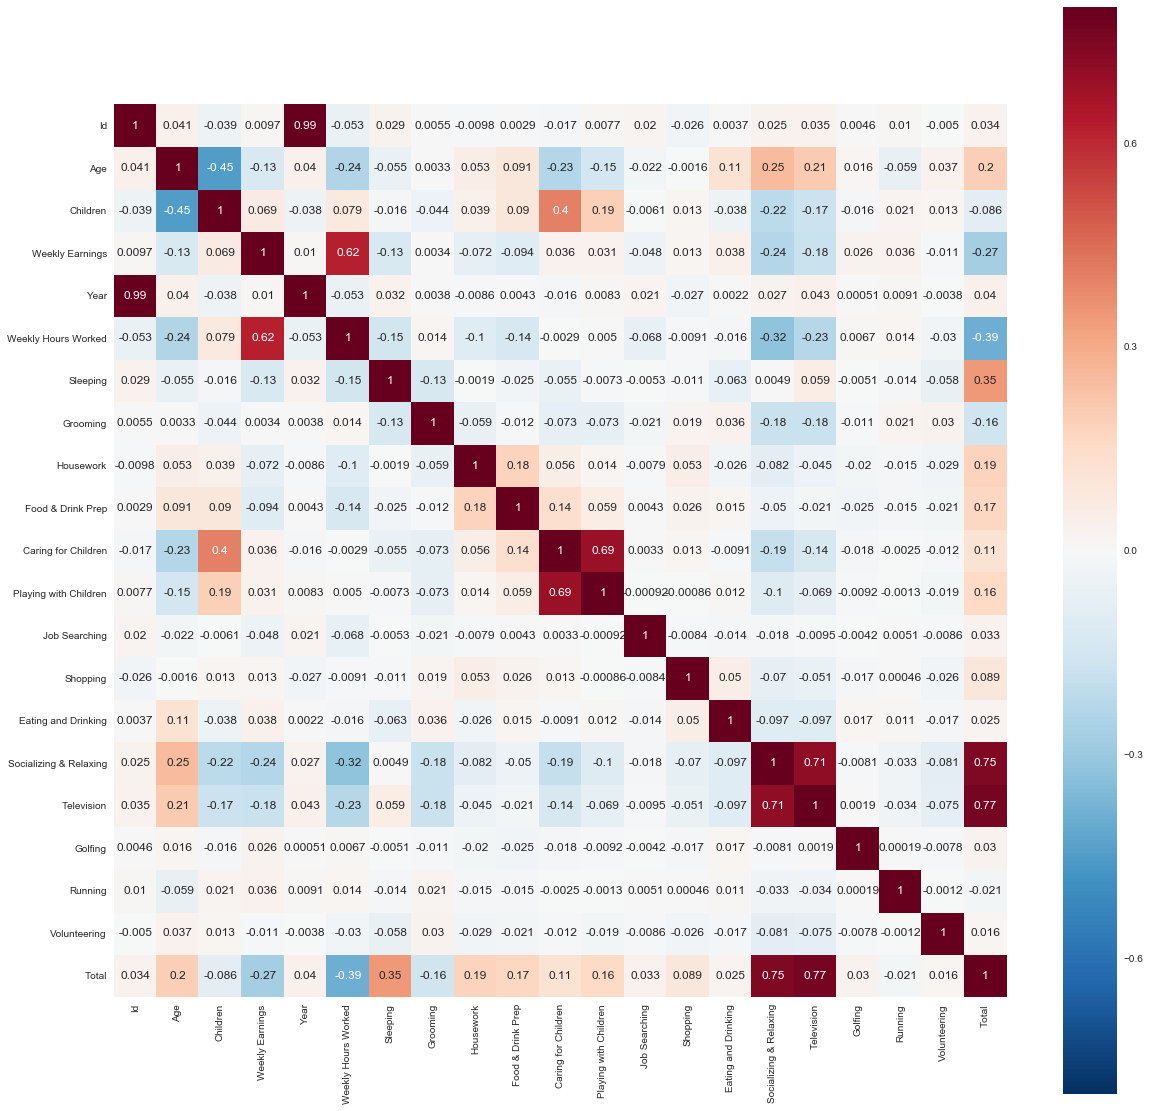

In [24]:
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corrmat, vmax=.8, square=True, annot=True)
plt.show()

Now, correlation is an important thing to study when studying any dataset. If independent variables are correlated with each other highly, then they can indicate multicollinearity. It is not advisable to have both the variables while building models as having only one can suffice and that the other is sort of redundant. Hence, we can go further with only one of highly correlated variables.

Here, we can see that the variables - "Socializing & Relaxing" and "Television" are correlated enough to indicate multicollinearity. So, we can move remove any one of these as they would not explain anything new in determining our target variable. Let's drop "Socializing & Relaxing". Also, "Playing with Children" and "Caring for Children" are correlated. Let's keep only "Playing with Children".

In [25]:
# Dropping correlated variables
df_train = df_train.drop(['Caring for Children', 'Socializing & Relaxing'],axis=1)
df_train.head()

,Id,Education Level,Age,Age Range,Employment Status,Gender,Children,Weekly Earnings,Year,Weekly Hours Worked,...,Food & Drink Prep,Playing with Children,Job Searching,Shopping,Eating and Drinking,Television,Golfing,Running,Volunteering,Total
0,1,High School,51,50-59,Unemployed,Female,0,0,2005,0,...,45,0,0,0,40,120,0,0,0,1440.0
1,2,Bachelor,42,40-49,Employed,Female,2,1480,2005,2400,...,60,20,0,120,40,15,0,0,0,1295.0
2,3,Master,47,40-49,Employed,Male,0,904,2005,2400,...,0,0,0,15,85,199,0,0,0,1064.0
3,4,Some College,21,20-29,Employed,Female,0,320,2005,2400,...,135,0,0,105,30,240,0,0,0,1610.0
4,5,High School,49,40-49,Not in labor force,Female,0,0,2005,0,...,15,0,0,0,35,40,0,0,0,1425.0


In [26]:
# Dropping 'Id' as it doesn't affect target variable for obvious reason
df_train = df_train.drop(['Id'],axis=1)
df_train.head()

,Education Level,Age,Age Range,Employment Status,Gender,Children,Weekly Earnings,Year,Weekly Hours Worked,Sleeping,...,Food & Drink Prep,Playing with Children,Job Searching,Shopping,Eating and Drinking,Television,Golfing,Running,Volunteering,Total
0,High School,51,50-59,Unemployed,Female,0,0,2005,0,825,...,45,0,0,0,40,120,0,0,0,1440.0
1,Bachelor,42,40-49,Employed,Female,2,1480,2005,2400,500,...,60,20,0,120,40,15,0,0,0,1295.0
2,Master,47,40-49,Employed,Male,0,904,2005,2400,480,...,0,0,0,15,85,199,0,0,0,1064.0
3,Some College,21,20-29,Employed,Female,0,320,2005,2400,705,...,135,0,0,105,30,240,0,0,0,1610.0
4,High School,49,40-49,Not in labor force,Female,0,0,2005,0,470,...,15,0,0,0,35,40,0,0,0,1425.0


### Data Pre-Processing

In [27]:
df = df_train.drop('Employment Status', axis=1)
df = pd.get_dummies(df)
df = df.join(df_train['Employment Status'])
df.head()

,Age,Children,Weekly Earnings,Year,Weekly Hours Worked,Sleeping,Grooming,Housework,Food & Drink Prep,Playing with Children,...,Age Range_20-29,Age Range_30-39,Age Range_40-49,Age Range_50-59,Age Range_60-69,Age Range_70-79,Age Range_80+,Gender_Female,Gender_Male,Employment Status
0,51,0,0,2005,0,825,80,150,45,0,...,0,0,0,1,0,0,0,1,0,Unemployed
1,42,2,1480,2005,2400,500,10,150,60,20,...,0,0,1,0,0,0,0,1,0,Employed
2,47,0,904,2005,2400,480,70,1,0,0,...,0,0,1,0,0,0,0,0,1,Employed
3,21,0,320,2005,2400,705,65,90,135,0,...,1,0,0,0,0,0,0,1,0,Employed
4,49,0,0,2005,0,470,60,205,15,0,...,0,0,1,0,0,0,0,1,0,Not in labor force


In [28]:
# Perform Label Encoding to Target Variable
df = df.select_dtypes(exclude=['number']) \
                .apply(LabelEncoder().fit_transform)\
                .join(df.select_dtypes(include=['number']))
df = pd.DataFrame(df)
df.head()

,Employment Status,Age,Children,Weekly Earnings,Year,Weekly Hours Worked,Sleeping,Grooming,Housework,Food & Drink Prep,...,Age Range_0-19,Age Range_20-29,Age Range_30-39,Age Range_40-49,Age Range_50-59,Age Range_60-69,Age Range_70-79,Age Range_80+,Gender_Female,Gender_Male
0,2,51,0,0,2005,0,825,80,150,45,...,0,0,0,0,1,0,0,0,1,0
1,0,42,2,1480,2005,2400,500,10,150,60,...,0,0,0,1,0,0,0,0,1,0
2,0,47,0,904,2005,2400,480,70,1,0,...,0,0,0,1,0,0,0,0,0,1
3,0,21,0,320,2005,2400,705,65,90,135,...,0,1,0,0,0,0,0,0,1,0
4,1,49,0,0,2005,0,470,60,205,15,...,0,0,0,1,0,0,0,0,1,0


Remember we added **SMOTETomek** to our **TO-DO-LIST**? Now is the time to do some oversampling and synthesize new samples to make our dataset comprise of nearly equal number of samples for each of the classes.

In [32]:
#Filter independent variables and dependent variable
cols = df.shape[1]
X = df.iloc[:,1:cols]                                                      
y = df.iloc[:,0:cols-(cols-1)]

# Synthesizing data using over-sampling using SMOTE
smt = SMOTETomek(random_state=170130)
X_post_synth, y_post_synth = smt.fit_sample(X, y)
print('Resampled dataset size: {0}'.format(sorted(Counter(y_post_synth).items())))
y_post_synth = np.reshape(y_post_synth,(len(y_post_synth),1))
print('Shape of X_post_synth: ', X_post_synth.shape)
print('Shape of y_post_synth: ', y_post_synth.shape)

Resampled dataset size: [(0, 41050), (1, 41025), (2, 41069)]
Shape of X_post_synth:  (123144, 39)
Shape of y_post_synth:  (123144, 1)


Let,s see this visually now.

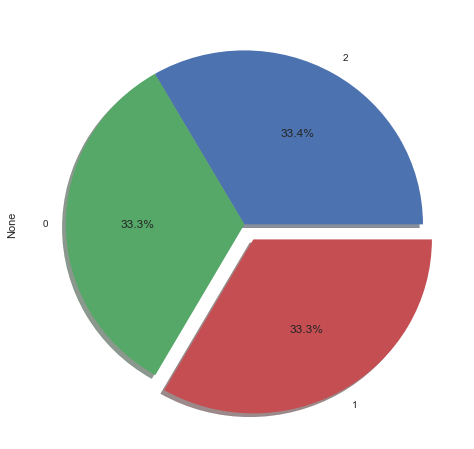

In [33]:
# Distribution of Employment Status
f, ax = plt.subplots(1,1, figsize=(8, 8))
pd.Series(y_post_synth[:,0]).value_counts().plot.pie(explode=[0,0,0.1], autopct='%1.1f%%', ax=ax, shadow=True)
plt.show()

Thats it! Now we have almost same number of samples in each of the classes. That's really good, as moving forward, we'll have unbiased models.

#### Scaling the data

In [35]:
scaler = MinMaxScaler()
scaled_X_post_synth = scaler.fit_transform(X_post_synth)

In [36]:
# Train-Test Split
X_train,X_valid,y_train,y_valid = train_test_split(scaled_X_post_synth,y_post_synth,test_size=0.25, random_state = 170130)

#### Function to plot Confusion Matrix

In [37]:
sns.set_style('white')

## Confusion Matrix
class_names = ['Employeed', 'Not in labor force', 'Unemployeed']

def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## 3. Model Design

### LOGISTIC REGRESSION

In [38]:
fold = KFold(len(y_train), n_folds=10, shuffle=True, random_state=777)
logit = LogisticRegressionCV(Cs=list(np.power(10.0, np.arange(-10, 10)))
        ,penalty='l2'
        ,scoring='roc_auc'
        ,cv=fold
        ,random_state=170130
        ,max_iter=10
        ,fit_intercept=True
        ,solver='newton-cg')
logl = logit.fit(X_train,y_train)

In [50]:
print("-------------------------------------------------------------")
print("Max auc_roc score: {}".format(logl.scores_[1].max()))
print("Best mean auc_roc score: {:.4f}".format(logl.scores_[1].mean(axis=0).max()))
print("-------------------------------------------------------------")

-------------------------------------------------------------
Max auc_roc score: 0.9284572931148645
Best mean auc_roc score: 0.9244
-------------------------------------------------------------


-------------------------------------------------------------

Accuracy score on train data: 0.844085
Accuracy score on valid data: 0.842169
Classification Report:
             precision    recall  f1-score   support

          0       1.00      0.99      0.99     10253
          1       0.82      0.68      0.75     10318
          2       0.72      0.86      0.78     10215

avg / total       0.85      0.84      0.84     30786

-------------------------------------------------------------



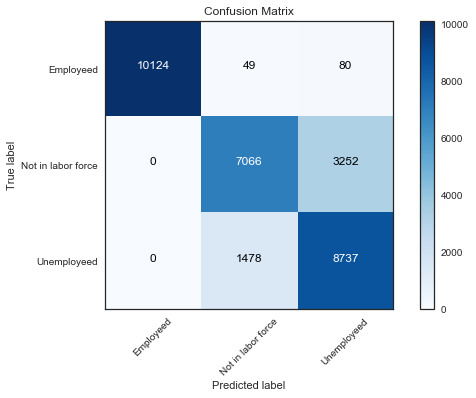

In [47]:
y_pred_train = logl.predict(X_train)
y_pred_valid = logl.predict(X_valid)

acc_train = metrics.accuracy_score(y_train, y_pred_train)
acc_valid = metrics.accuracy_score(y_valid, y_pred_valid)
rp = metrics.classification_report(y_valid, y_pred_valid)
print("-------------------------------------------------------------")
print('')
print("Accuracy score on train data: {:5f}".format(acc_train))
print("Accuracy score on valid data: {:5f}".format(acc_valid))
print("Classification Report:")
print(rp)
print("-------------------------------------------------------------")
print('')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_valid, y_pred_valid)
np.set_printoptions(precision=2)

# Plot confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix')
plt.show()

### RANDOM FOREST

In [41]:
ran_for_cl = RandomForestClassifier(random_state=170130, criterion = 'entropy')
ran_for_cl.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=170130, verbose=0,
            warm_start=False)

-------------------------------------------------------------

Accuracy score on train data: 0.996687
Accuracy score on valid data: 0.922822
Classification Report:
             precision    recall  f1-score   support

          0       1.00      0.99      0.99     10253
          1       0.89      0.88      0.89     10318
          2       0.88      0.90      0.89     10215

avg / total       0.92      0.92      0.92     30786

-------------------------------------------------------------



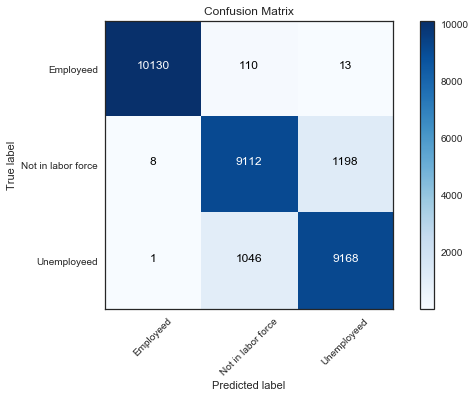

In [46]:
y_pred_ran_train = ran_for_cl.predict(X_train)
y_pred_ran_valid = ran_for_cl.predict(X_valid)

acc_ran_train = metrics.accuracy_score(y_train, y_pred_ran_train)
acc_ran_valid = metrics.accuracy_score(y_valid, y_pred_ran_valid)
rp_ran = metrics.classification_report(y_valid, y_pred_ran_valid)
print("-------------------------------------------------------------")
print('')
print("Accuracy score on train data: {:5f}".format(acc_ran_train))
print("Accuracy score on valid data: {:5f}".format(acc_ran_valid))
print("Classification Report:")
print(rp_ran)
print("-------------------------------------------------------------")
print('')

# Compute confusion matrix
cnf_mat = confusion_matrix(y_valid, y_pred_ran_valid)
np.set_printoptions(precision=2)

# Plot confusion matrix
plt.figure()
plot_confusion_matrix(cnf_mat, classes=class_names,
                      title='Confusion matrix')
plt.show()

### SVM

In [43]:
svm_cl = svm.SVC(kernel = 'rbf', random_state = 121)
svm_cl.fit(X_train, y_train)
y_pred_svc_train = svm_cl.predict(X_train)
y_pred_svc_valid = svm_cl.predict(X_valid)

-------------------------------------------------------------
Accuracy score on train data: 0.837090
Accuracy score on valid data: 0.831254
Classification Report:
             precision    recall  f1-score   support

          0       1.00      0.94      0.97     10253
          1       0.82      0.67      0.74     10318
          2       0.71      0.88      0.78     10215

avg / total       0.84      0.83      0.83     30786

-------------------------------------------------------------


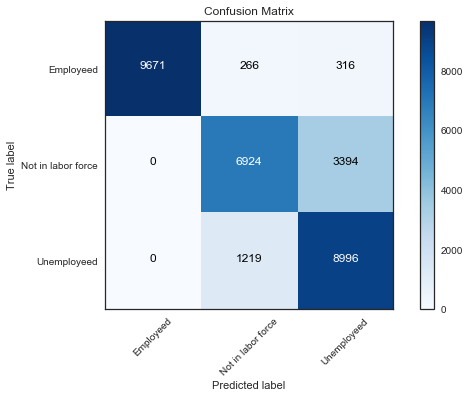

In [45]:
acc_svm_train = metrics.accuracy_score(y_train,y_pred_svc_train)
acc_svm_valid = metrics.accuracy_score(y_valid,y_pred_svc_valid)

svm_rp = metrics.classification_report(y_valid, y_pred_svc_valid)
print("-------------------------------------------------------------")
print("Accuracy score on train data: {:5f}".format(acc_svm_train))
print("Accuracy score on valid data: {:5f}".format(acc_svm_valid))
print("Classification Report:")
print(svm_rp)
print("-------------------------------------------------------------")
# Compute confusion matrix
cm_svm = confusion_matrix(y_valid, y_pred_svc_valid)
np.set_printoptions(precision=2)

# Plot confusion matrix
plt.figure()
plot_confusion_matrix(cm_svm, classes=class_names,
                      title='Confusion matrix')
plt.show()

### NAIVE BAYES CLASSIFIER

In [53]:
nb_cl = GaussianNB()
nb_cl.fit(X_train, y_train)

GaussianNB(priors=None)

-------------------------------------------------------------

Accuracy score on train data: 0.828916
Accuracy score on valid data: 0.823264
Classification Report:
             precision    recall  f1-score   support

          0       0.98      0.99      0.99     10253
          1       0.85      0.60      0.70     10318
          2       0.69      0.89      0.77     10215

avg / total       0.84      0.82      0.82     30786

-------------------------------------------------------------



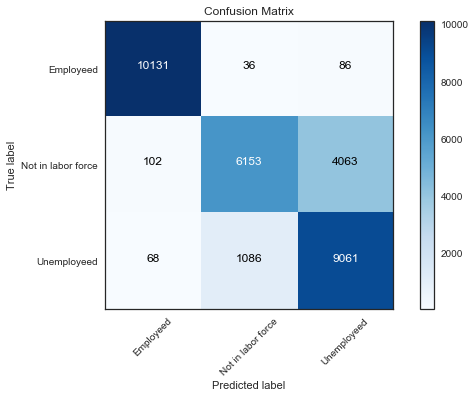

In [59]:
y_pred_ran_train = nb_cl.predict(X_train)
y_pred_ran_valid = nb_cl.predict(X_valid)

acc_ran_train = metrics.accuracy_score(y_train, y_pred_ran_train)
acc_ran_valid = metrics.accuracy_score(y_valid, y_pred_ran_valid)
rp_ran = metrics.classification_report(y_valid, y_pred_ran_valid)
print("-------------------------------------------------------------")
print('')
print("Accuracy score on train data: {:5f}".format(acc_ran_train))
print("Accuracy score on valid data: {:5f}".format(acc_ran_valid))
print("Classification Report:")
print(rp_ran)
print("-------------------------------------------------------------")
print('')

# Compute confusion matrix
cnf_mat = confusion_matrix(y_valid, y_pred_ran_valid)
np.set_printoptions(precision=2)

# Plot confusion matrix
plt.figure()
plot_confusion_matrix(cnf_mat, classes=class_names,
                      title='Confusion matrix')
plt.show()

### K-NEAREST NEIGHBOURS

In [57]:
knn_cl = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn_cl.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

-------------------------------------------------------------

Accuracy score on train data: 0.909829
Accuracy score on valid data: 0.864127
Classification Report:
             precision    recall  f1-score   support

          0       0.97      0.92      0.94     10253
          1       0.84      0.78      0.80     10318
          2       0.80      0.90      0.85     10215

avg / total       0.87      0.86      0.86     30786

-------------------------------------------------------------



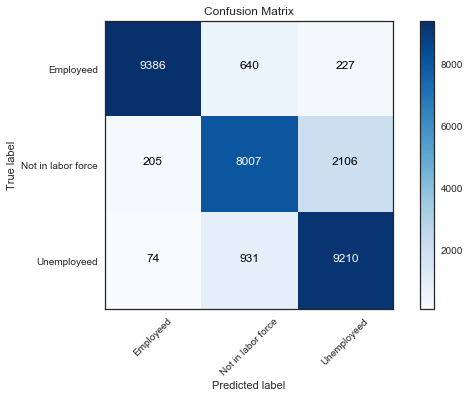

In [60]:
y_pred_ran_train = knn_cl.predict(X_train)
y_pred_ran_valid = knn_cl.predict(X_valid)

acc_ran_train = metrics.accuracy_score(y_train, y_pred_ran_train)
acc_ran_valid = metrics.accuracy_score(y_valid, y_pred_ran_valid)
rp_ran = metrics.classification_report(y_valid, y_pred_ran_valid)
print("-------------------------------------------------------------")
print('')
print("Accuracy score on train data: {:5f}".format(acc_ran_train))
print("Accuracy score on valid data: {:5f}".format(acc_ran_valid))
print("Classification Report:")
print(rp_ran)
print("-------------------------------------------------------------")
print('')

# Compute confusion matrix
cnf_mat = confusion_matrix(y_valid, y_pred_ran_valid)
np.set_printoptions(precision=2)

# Plot confusion matrix
plt.figure()
plot_confusion_matrix(cnf_mat, classes=class_names,
                      title='Confusion matrix')
plt.show()

### DECISION TREES

In [62]:
dt_cl = DecisionTreeClassifier(criterion = 'entropy', random_state = 170130)
dt_cl.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False,
            random_state=170130, splitter='best')

-------------------------------------------------------------

Accuracy score on train data: 1.000000
Accuracy score on valid data: 0.893815
Classification Report:
             precision    recall  f1-score   support

          0       0.99      0.99      0.99     10253
          1       0.86      0.82      0.84     10318
          2       0.83      0.87      0.85     10215

avg / total       0.89      0.89      0.89     30786

-------------------------------------------------------------



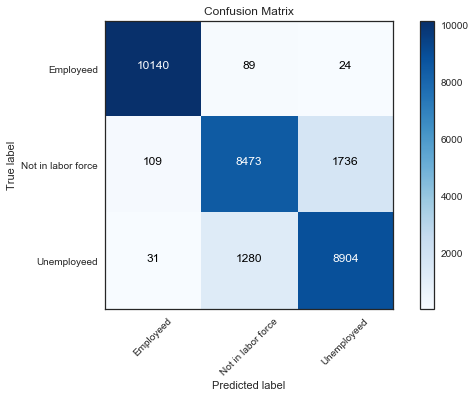

In [63]:
y_pred_ran_train = dt_cl.predict(X_train)
y_pred_ran_valid = dt_cl.predict(X_valid)

acc_ran_train = metrics.accuracy_score(y_train, y_pred_ran_train)
acc_ran_valid = metrics.accuracy_score(y_valid, y_pred_ran_valid)
rp_ran = metrics.classification_report(y_valid, y_pred_ran_valid)
print("-------------------------------------------------------------")
print('')
print("Accuracy score on train data: {:5f}".format(acc_ran_train))
print("Accuracy score on valid data: {:5f}".format(acc_ran_valid))
print("Classification Report:")
print(rp_ran)
print("-------------------------------------------------------------")
print('')

# Compute confusion matrix
cnf_mat = confusion_matrix(y_valid, y_pred_ran_valid)
np.set_printoptions(precision=2)

# Plot confusion matrix
plt.figure()
plot_confusion_matrix(cnf_mat, classes=class_names,
                      title='Confusion matrix')
plt.show()